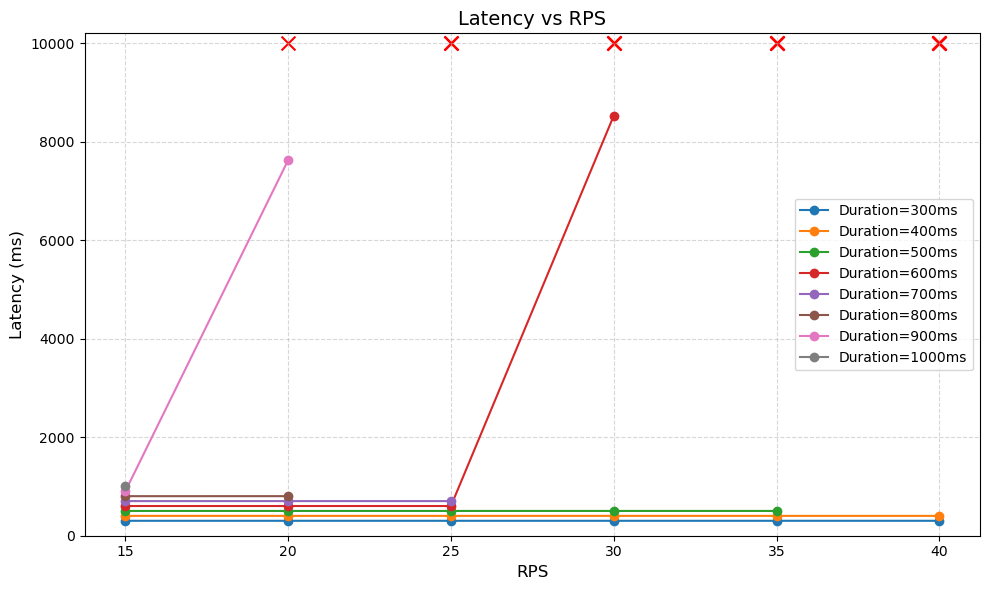

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np

# --- Manual input of experiment results ---
# Each entry: RPS, Duration (ms), Distribution, Latency (ms), CPU Util (%)
TIMEOUT = 20000
experiment_data = [
    {"RPS": 15, "DURATION_MS": 300, "LATENCY_MS": 303.03},
    {"RPS": 20, "DURATION_MS": 300, "LATENCY_MS": 302.92},
    {"RPS": 25, "DURATION_MS": 300, "LATENCY_MS": 303.02},
    {"RPS": 30, "DURATION_MS": 300, "LATENCY_MS": 302.97},
    {"RPS": 35, "DURATION_MS": 300, "LATENCY_MS": 302.95},
    {"RPS": 40, "DURATION_MS": 300, "LATENCY_MS": 303.18},

    {"RPS": 15, "DURATION_MS": 400, "LATENCY_MS": 402.99},
    {"RPS": 20, "DURATION_MS": 400, "LATENCY_MS": 402.91},
    {"RPS": 25, "DURATION_MS": 400, "LATENCY_MS": 402.92},
    {"RPS": 30, "DURATION_MS": 400, "LATENCY_MS": 402.98},
    {"RPS": 35, "DURATION_MS": 400, "LATENCY_MS": 402.88},
    {"RPS": 40, "DURATION_MS": 400, "LATENCY_MS": 402.89},

    {"RPS": 15, "DURATION_MS": 500, "LATENCY_MS": 503.01},
    {"RPS": 20, "DURATION_MS": 500, "LATENCY_MS": 503.02},
    {"RPS": 25, "DURATION_MS": 500, "LATENCY_MS": 503.00},
    {"RPS": 30, "DURATION_MS": 500, "LATENCY_MS": 503.13},
    {"RPS": 35, "DURATION_MS": 500, "LATENCY_MS": 503.12},
    {"RPS": 40, "DURATION_MS": 500, "LATENCY_MS": TIMEOUT},

    {"RPS": 15, "DURATION_MS": 600, "LATENCY_MS": 603.03},
    {"RPS": 20, "DURATION_MS": 600, "LATENCY_MS": 603.02},
    {"RPS": 25, "DURATION_MS": 600, "LATENCY_MS": 603.11},
    {"RPS": 30, "DURATION_MS": 600, "LATENCY_MS": 8525.65},
    {"RPS": 35, "DURATION_MS": 600, "LATENCY_MS": TIMEOUT},
    {"RPS": 40, "DURATION_MS": 600, "LATENCY_MS": TIMEOUT},

    {"RPS": 15, "DURATION_MS": 700, "LATENCY_MS": 703.06},
    {"RPS": 20, "DURATION_MS": 700, "LATENCY_MS": 703.10},
    {"RPS": 25, "DURATION_MS": 700, "LATENCY_MS": 703.14},
    {"RPS": 30, "DURATION_MS": 700, "LATENCY_MS": TIMEOUT},
    {"RPS": 35, "DURATION_MS": 700, "LATENCY_MS": TIMEOUT},
    {"RPS": 40, "DURATION_MS": 700, "LATENCY_MS": TIMEOUT},

    {"RPS": 15, "DURATION_MS": 800, "LATENCY_MS": 803.07},
    {"RPS": 20, "DURATION_MS": 800, "LATENCY_MS": 803.24},
    {"RPS": 25, "DURATION_MS": 800, "LATENCY_MS": TIMEOUT},
    {"RPS": 30, "DURATION_MS": 800, "LATENCY_MS": TIMEOUT},
    {"RPS": 35, "DURATION_MS": 800, "LATENCY_MS": TIMEOUT},
    {"RPS": 40, "DURATION_MS": 800, "LATENCY_MS": TIMEOUT},

    {"RPS": 15, "DURATION_MS": 900, "LATENCY_MS": 903.09},
    {"RPS": 20, "DURATION_MS": 900, "LATENCY_MS": 7625.06},
    {"RPS": 25, "DURATION_MS": 900, "LATENCY_MS": TIMEOUT},
    {"RPS": 30, "DURATION_MS": 900, "LATENCY_MS": TIMEOUT},
    {"RPS": 35, "DURATION_MS": 900, "LATENCY_MS": TIMEOUT},
    {"RPS": 40, "DURATION_MS": 900, "LATENCY_MS": TIMEOUT},

    {"RPS": 15, "DURATION_MS": 1000, "LATENCY_MS": 1003.14},
    {"RPS": 20, "DURATION_MS": 1000, "LATENCY_MS": TIMEOUT},
    {"RPS": 25, "DURATION_MS": 1000, "LATENCY_MS": TIMEOUT},
    {"RPS": 30, "DURATION_MS": 1000, "LATENCY_MS": TIMEOUT},
    {"RPS": 35, "DURATION_MS": 1000, "LATENCY_MS": TIMEOUT},
    {"RPS": 40, "DURATION_MS": 1000, "LATENCY_MS": TIMEOUT},
]

# Convert to DataFrame
df = pd.DataFrame(experiment_data)

# --- Cap or filter extreme latency ---
MAX_LATENCY = 10000  # cap threshold for visualization
df['LATENCY_PLOT'] = df['LATENCY_MS'].apply(lambda x: x if x <= MAX_LATENCY else np.nan)
df['IS_TIMEOUT'] = df['LATENCY_MS'] > MAX_LATENCY

# --- Plot RPS vs Latency with aesthetics ---
def plot_latency_vs_rps(df, output_dir="plots"):
    os.makedirs(output_dir, exist_ok=True)
    
    durations = sorted(df['DURATION_MS'].unique())
    
    plt.figure(figsize=(10,6))
    
    for dur in durations:
        subset = df[df['DURATION_MS'] == dur]
        
        # Normal latency line
        plt.plot(subset['RPS'], subset['LATENCY_PLOT'], marker='o', linestyle='-', label=f'Duration={dur}ms')
        
        # Timeout points (shown but not in legend)
        timeout_subset = subset[subset['IS_TIMEOUT']]
        plt.scatter(timeout_subset['RPS'], [MAX_LATENCY]*len(timeout_subset), 
                    color='red', marker='x', s=100, label="_nolegend_")
    
    plt.xlabel("RPS", fontsize=12)
    plt.ylabel("Latency (ms)", fontsize=12)
    plt.title("Latency vs RPS", fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.ylim(0, MAX_LATENCY+200)
    plt.legend()
    plt.tight_layout()
    
    plt.savefig(os.path.join(output_dir, "latency_vs_rps_aesthetic.png"))
    plt.show()

if __name__ == "__main__":
    plot_latency_vs_rps(df)